# English Alphabet Classification using CNN approach

### This is a continuation of the English Alphabet Classification project where we have already used a MLP model to detect the alphabet labels but it proved to be inefficient with a validation accuracy of only 47.69%.

 ### So we will try to build a Convolutional Neural Network model  on the training dataset and compare its accuracy with the MLP model.

In [1]:
import os
import numpy as np
import cv2
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import skimage
from skimage.transform import resize

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

import tensorflow as tf

from glob import glob
from matplotlib import pyplot as plt
import random
import math
import os
import numpy as np
from numpy.random import seed
seed(100)
tf.random.set_seed(101) 

### Importing dataset

In [2]:
paths = r'C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/'
for dirname, _, filenames in os.walk(r'C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/'):
    print(dirname)

C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/a
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/b
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/c
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/d
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/e
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/f
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/g
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/h
C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/i
C:\Users\KIIT\Documents\LGM-Soc contributions\Engli

In [3]:
paths

'C:\\Users\\KIIT\\Documents\\LGM-Soc contributions\\English Alphabet Classification\\Dataset\\images/'

In [4]:
categories = os.listdir(paths)
print("No. of categories of images in the train set = ",len(categories))

No. of categories of images in the train set =  26


In [5]:
categories

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

#### Since this is a supervised learning approach to train the model we will have to label the images before giving it as input to the CNN model


In [6]:
def load_img_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        n = 0
        for image_name in os.listdir(paths+"/"+category):
            if n==100:
                break
                
            #load image data into an array
            img = cv2.imread(paths+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = Image.fromarray(img, 'RGB')
            
             #resizing the image
            resized_img = img_array.resize((200, 200))
            
            #converting the image array to numpy array before appending it to the list
            img_lst.append(np.array(resized_img))
            
            if(index==0):
                v_type = "a"
            elif(index==1):
                v_type = "b"
            elif(index==2):
                v_type = "c"
            elif(index==3):
                v_type = "d"
            elif(index==4):
                v_type = "e"
            elif(index==5):
                v_type = "f"
            elif(index==6):
                v_type = "g"
            elif(index==7):
                v_type = "h"
            elif(index==8):
                v_type = "i"
            elif(index==9):
                v_type = "j"
            elif(index==10):
                v_type = "k"
            elif(index==11):
                v_type = "l"
            elif(index==12):
                v_type = "m"
            elif(index==13):
                v_type = "n"
            elif(index==14):
                v_type = "o"
            elif(index==15):
                v_type = "p"
            elif(index==16):
                v_type = "q"
            elif(index==17):
                v_type = "r"
            elif(index==18):
                v_type = "s"
            elif(index==19):
                v_type = "t"
            elif(index==20):
                v_type = "u"
            elif(index==21):
                v_type = "v"
            elif(index==22):
                v_type = "w"
            elif(index==23):
                v_type = "x"
            elif(index==24):
                v_type = "y"
            else:
                v_type = "z"
            
            #appending label
            labels.append(v_type)
            
            n+=1
    return img_lst, labels

In [7]:
images, labels = load_img_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  2600 
No. of labels loaded =  2600
<class 'list'> <class 'list'>


#### Converting the images and labels into numpy arrays

In [8]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (2600, 200, 200, 3) 
Labels shape =  (2600,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


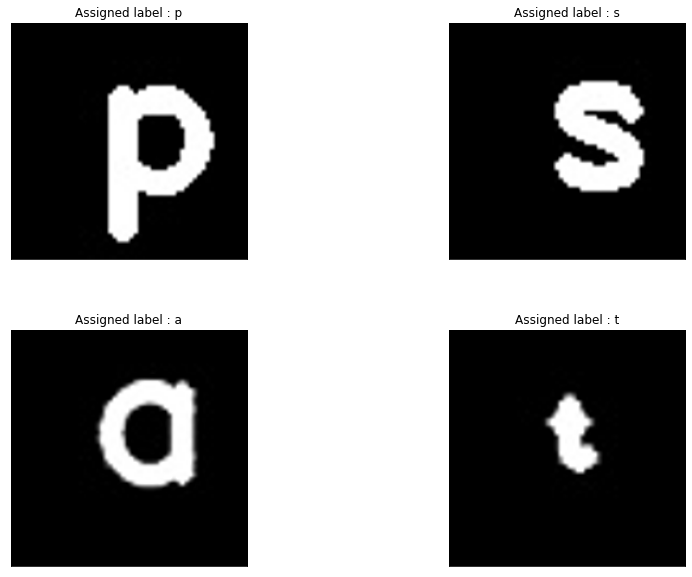

In [9]:
def display_label_images(images, labels):
    plt.figure(1 , figsize = (15 , 10))
    n = 0 
    for i in range(4):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(2, 2, n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.1)
        plt.imshow(images[r[0]])
        
        plt.title('Assigned label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_label_images(images, labels)

### Performing Data Augmentation using ImageDataGenerator to import training images and augment more images

In [10]:
dataPath =  r'C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Dataset\images/'
resizeTuple = (64, 64)
resizeDim = (64, 64, 3)
numLabels = 26
batchSize = 12

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(samplewise_center=True, 
                                    samplewise_std_normalization=True, 
                                    validation_split=0.1)

train_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, shuffle=True, subset="training")
val_generator = data_generator.flow_from_directory(dataPath, target_size=resizeTuple, batch_size=batchSize, subset="validation")

Found 2340 images belonging to 26 classes.
Found 260 images belonging to 26 classes.


## Building the CNN model

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten

In [12]:
CNN_model = Sequential([
    Conv2D(32, (5, 5), input_shape=(64, 64, 3)),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    tf.keras.layers.Dropout(rate=0.3),
    
    Conv2D(64, (3, 3)),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(26, activation='softmax')
])

CNN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 60, 60, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [14]:
CNN_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
CNN = CNN_model.fit(
    train_generator,
    epochs=50,
    batch_size=12,
    verbose=2,
    validation_data=val_generator,
)

Epoch 1/50
195/195 - 11s - loss: 2.1924 - accuracy: 0.3564 - val_loss: 1.3655 - val_accuracy: 0.5692
Epoch 2/50
195/195 - 10s - loss: 0.8525 - accuracy: 0.7325 - val_loss: 0.8960 - val_accuracy: 0.7385
Epoch 3/50
195/195 - 10s - loss: 0.4102 - accuracy: 0.8679 - val_loss: 0.7537 - val_accuracy: 0.7846
Epoch 4/50
195/195 - 10s - loss: 0.2557 - accuracy: 0.9124 - val_loss: 0.6484 - val_accuracy: 0.8000
Epoch 5/50
195/195 - 10s - loss: 0.1949 - accuracy: 0.9368 - val_loss: 0.4836 - val_accuracy: 0.9038
Epoch 6/50
195/195 - 10s - loss: 0.1449 - accuracy: 0.9517 - val_loss: 0.4252 - val_accuracy: 0.8962
Epoch 7/50
195/195 - 12s - loss: 0.1273 - accuracy: 0.9556 - val_loss: 0.5166 - val_accuracy: 0.8500
Epoch 8/50
195/195 - 11s - loss: 0.1124 - accuracy: 0.9667 - val_loss: 0.4848 - val_accuracy: 0.8923
Epoch 9/50
195/195 - 11s - loss: 0.1061 - accuracy: 0.9705 - val_loss: 0.5335 - val_accuracy: 0.9000
Epoch 10/50
195/195 - 11s - loss: 0.0913 - accuracy: 0.9697 - val_loss: 0.5011 - val_accura

### After training the CNN model we get a training accuracy of 98.80% and a validation accuracy of 92.69% after 50 epochs

In [16]:
CNN_history = pd.DataFrame(CNN.history)

#### Plotting the accuracy and validation accuracy

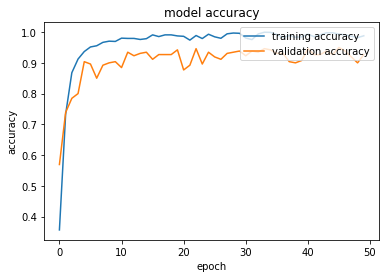

In [17]:
CNN_history.loc[0:, ['accuracy','val_accuracy']].plot()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper right')
plt.show()

#### Plottin the loss and validation loss

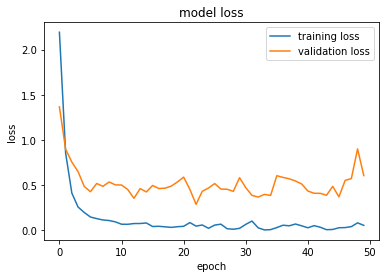

In [18]:
CNN_history.loc[0:, ['loss', 'val_loss']].plot()
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')
plt.show()

In [21]:
CNN_model.save(r'C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Model/CNN classifier.model')

INFO:tensorflow:Assets written to: C:\Users\KIIT\Documents\LGM-Soc contributions\English Alphabet Classification\Model/CNN classifier.model\assets
